# Домашнее задание №3 - Реализация базового варианта линейной регрессии

## Часть 1. Ваша реализация (60 баллов)

В этой части домашки вам предстоит **реализовать класс LinearRegressionSGD**, который обучает линейную регрессию методом стохастического градиентного спуска (SGD). Класс должен поддерживать **L1, L2 и Elastic Net регуляризацию**. Помимо этого, необходимо реализовать методы для **визуализации процесса обучения**: график функции потерь по эпохам и распределение ошибок на той или иной эпохе.

Ниже представлен шаблон кода с пропусками, которые необходимо заполнить.


* вычисление лосса (15 баллов)
* изменения в функции fit (25 баллов)
* predict (5 баллов)
* графики (15 баллов)

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [77]:
class LinearRegressionSGD:
    def __init__(self, lr=0.01, epochs=1000, reg_type=None, reg_lambda=0.01, alpha=0.5):
        """
        Initialize the Linear Regression model with SGD.
        :param lr: Learning rate
        :param epochs: Number of training epochs
        :param reg_type: Regularization type ('l1', 'l2', 'elastic_net', or None)
        :param reg_lambda: Regularization strength
        :param alpha: Mixing parameter for elastic net (0: L2, 1: L1)
        """
        self.lr = lr
        self.epochs = epochs
        self.reg_type = reg_type
        self.reg_lambda = reg_lambda
        self.alpha = alpha #ratio between l1 and l2 in elastic net
        self.theta = None #weights
        self.loss_history = []
        self.loss_history_ = [] #for test to draw loss
        self.error_history = []
    
    def _compute_loss(self, X, y):
        """Compute MSE loss with regularization."""
        m = len(y)
        predictions = X.dot(self.theta)
        loss = np.mean((predictions - y) ** 2) #MSE
        
        if self.reg_type == 'l2':
            loss += self.reg_lambda * np.sum(self.theta ** 2) / 2
        elif self.reg_type == 'l1':
            loss += self.reg_lambda * np.sum(np.abs(self.theta))
        elif self.reg_type == 'elastic_net':
            l1_term = self.alpha * np.sum(np.abs(self.theta))
            l2_term = (1 - self.alpha) * np.sum(self.theta ** 2) / 2
            loss += self.reg_lambda * (l1_term + l2_term)
        
        return loss
    
    def fit(self, X, y, X_test = None, y_test = None):
        """Train the model using stochastic gradient descent."""
        m, n = X.shape
        self.theta = np.zeros(n) #better random ?
        
        for epoch in range(self.epochs):
            errors = []
            for i in range(m):
                idx = np.random.randint(0, m) #choose a random row
                xi, yi = X[idx], y[idx]
                prediction = np.dot(xi, self.theta)
                error = prediction - yi
                errors.append(error)
                
                # Compute gradient
                gradient = xi * error

                # Apply regularization
                if self.reg_type == 'l2':
                    gradient += self.reg_lambda * self.theta
                elif self.reg_type == 'l1':
                    gradient += self.reg_lambda * np.sign(self.theta)
                elif self.reg_type == 'elastic_net':
                    l1_grad = self.alpha * np.sign(self.theta)
                    l2_grad = (1 - self.alpha) * self.theta
                    gradient += self.reg_lambda * (l1_grad + l2_grad)
                
                # Update weights
                self.theta -= self.lr * gradient
                
            # Compute loss at the end of each epoch
            loss = self._compute_loss(X, y)
            if X_test is not None and y_test is not None:
                loss_ = self._compute_loss(X_test, y_test)
                self.loss_history_.append(loss_)
            self.loss_history.append(loss)
            self.error_history.append(errors)
            
    def predict(self, X):
        """Make predictions using the trained model."""
        return X.dot(self.theta) #scalar multiplication
    
    def plot_loss(self):
        """Plot the loss distribution over epochs."""
        plt.plot(self.loss_history, label='Loss')
        if len(self.loss_history_) > 0:
            plt.plot(self.loss_history_, label='Loss_test')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss distribution over epochs')
        plt.legend()
        plt.show()
    
    def plot_error_distribution(self, epoch):
        """Plot the distribution of errors for all points at each epoch."""
        plt.hist(self.error_history[epoch], bins=30, alpha=0.7, label=f'Epoch {epoch}')
        plt.xlabel('Error')
        plt.ylabel('Frequency')
        plt.title(f'Error Distribution at Epoch {epoch}')
        plt.legend()
        plt.show()


## Часть 2. Проверяем вашу реализацию (25 баллов)

Теперь для полученного класса вам нужно будет посмотреть, **как ведет себя регрессия для разных вариантов регуляризации**. Советуем рассмотреть несколько наборов значений для каждого вида регуляризации, а также посмотреть на несколько значений learning rate. 
 
Ваша цель - **понять какие значения лучше или хуже подходят** в случае ваших данных.

В качестве данных вам предлагается использовать сгенерированные выборки. Ниже представлен код для генерации.

In [78]:
sample_size = 500

Сначала поменяем learning rate - кажется значение 0.001 подходит идеально, так как на графике мы видим выход на прямую без больших скачков

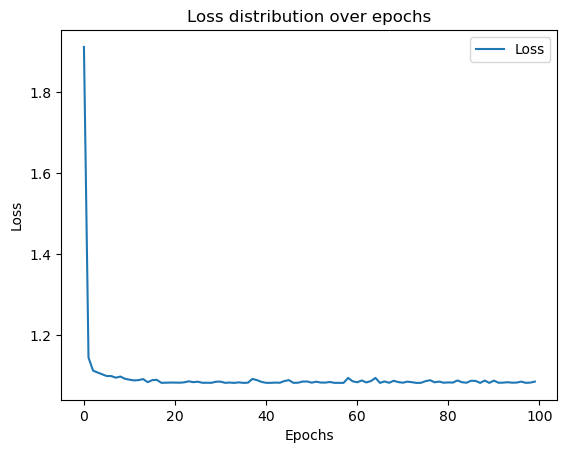

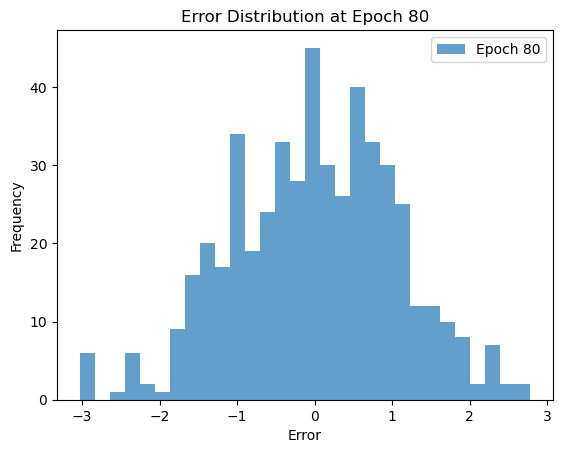

In [79]:
np.random.seed(1408)
X = 2 * np.random.rand(sample_size, 1)
y = 4 + 3 * X.squeeze() + np.random.randn(sample_size)

# Add bias term
X_b = np.c_[np.ones((sample_size, 1)), X]

model = LinearRegressionSGD(lr=0.002, epochs=100, reg_lambda=0.1, alpha=0.5)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

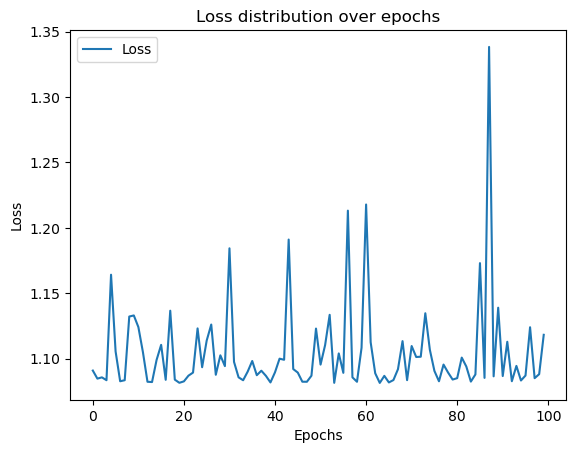

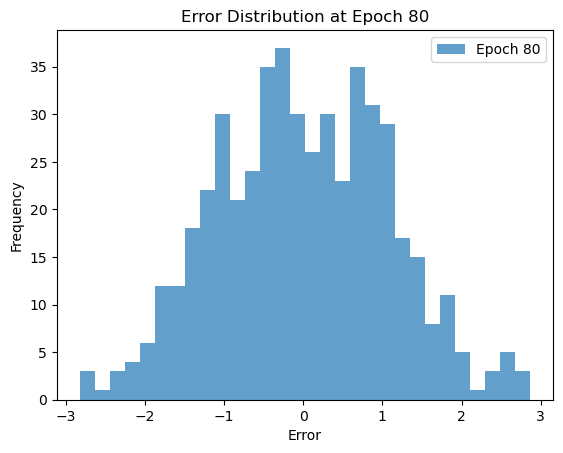

In [85]:
model = LinearRegressionSGD(lr=0.02, epochs=100, reg_lambda=0.1, alpha=0.5)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

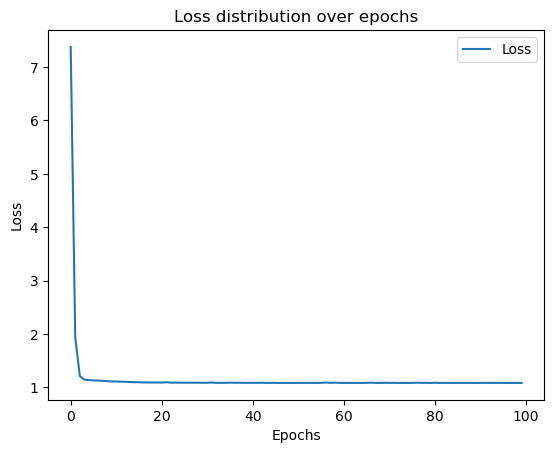

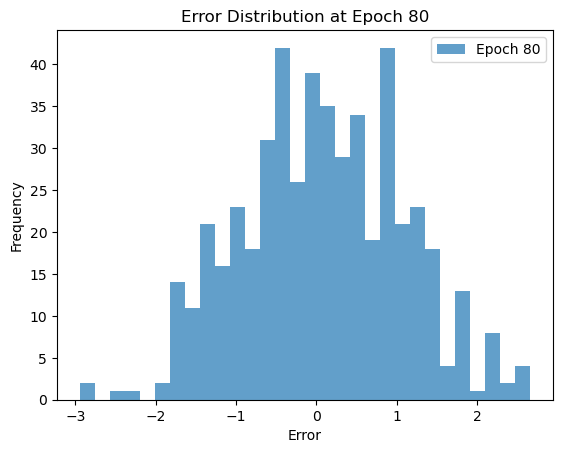

In [82]:
model = LinearRegressionSGD(lr=0.001, epochs=100, reg_lambda=0.1, alpha=0.5)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

Далее посмотрим на влияние регуляризации: будем менять тип регуляризации и параметр lambda 

**L1, lambda 0.1**

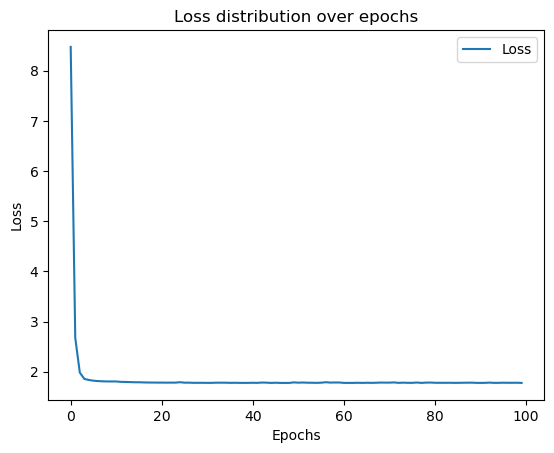

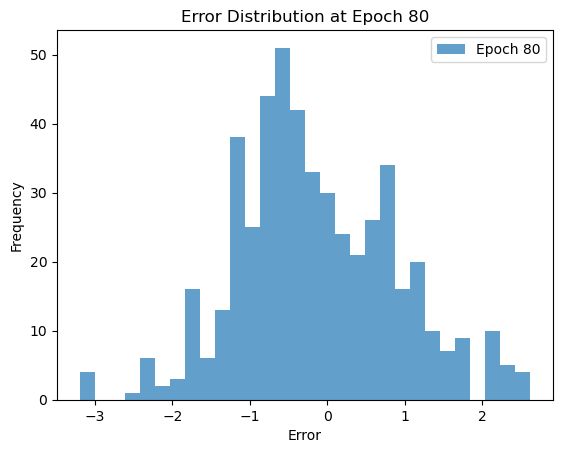

In [86]:
model = LinearRegressionSGD(lr=0.001, epochs=100, reg_type='l1', reg_lambda=0.1, alpha=0.5)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

**L1, lambda 0.3**

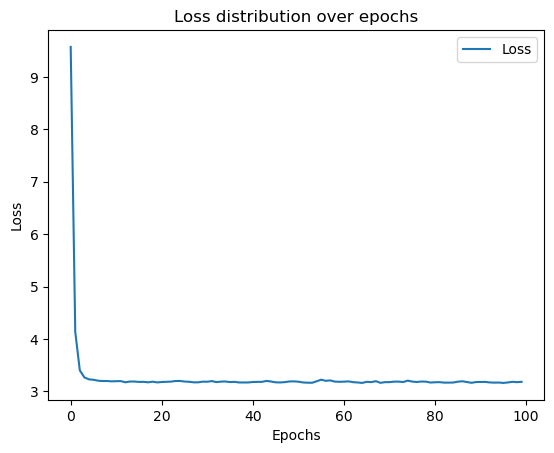

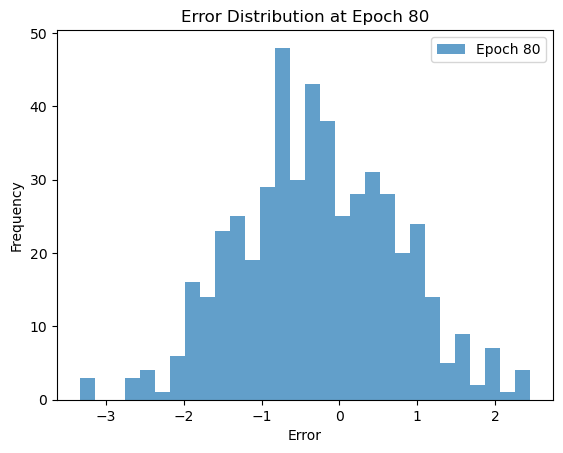

In [87]:
model = LinearRegressionSGD(lr=0.001, epochs=100, reg_type='l1', reg_lambda=0.3, alpha=0.5)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

**L1, lambda 0.5**

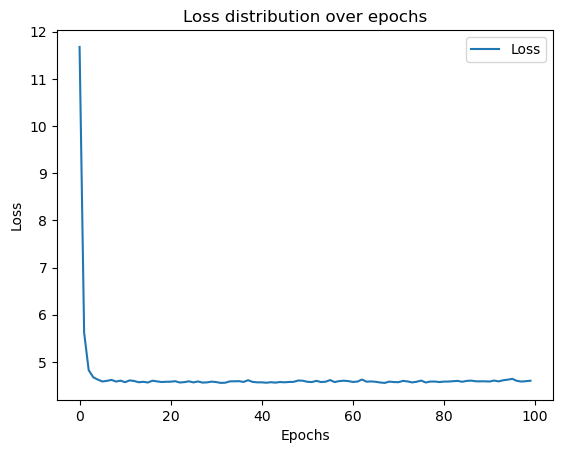

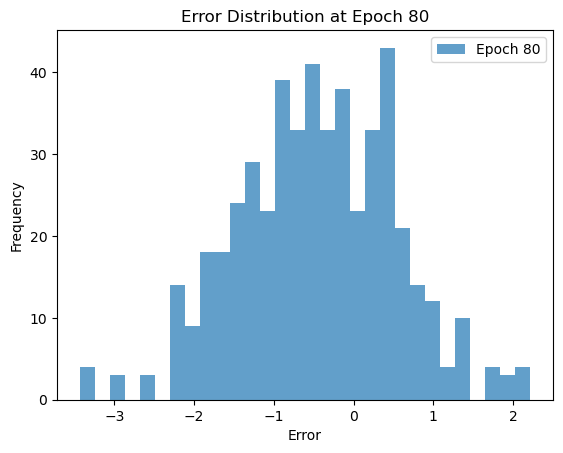

In [88]:
model = LinearRegressionSGD(lr=0.001, epochs=100, reg_type='l1', reg_lambda=0.5, alpha=0.5)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

**L2, lambda 0.1**

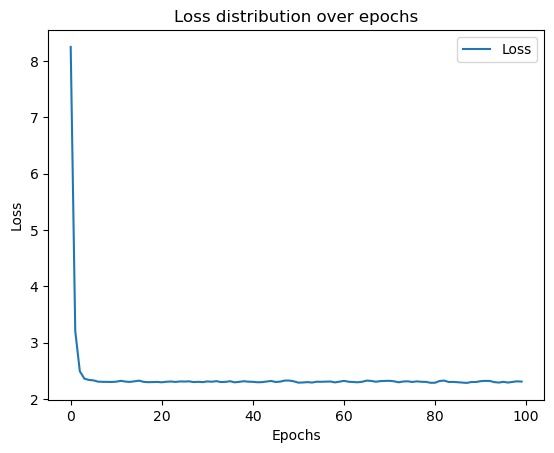

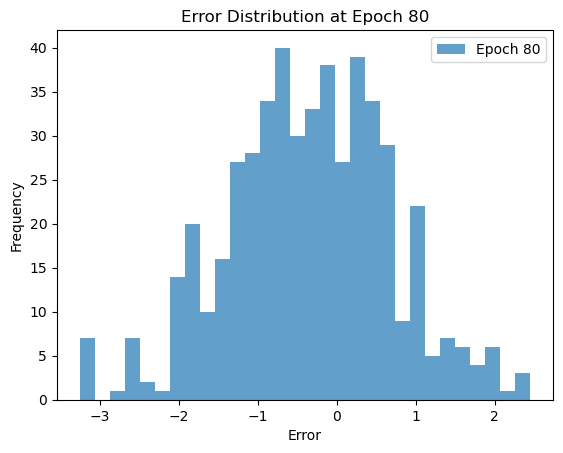

In [89]:
model = LinearRegressionSGD(lr=0.001, epochs=100, reg_type='l2', reg_lambda=0.1, alpha=0.5)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

**L2, lambda 0.3**

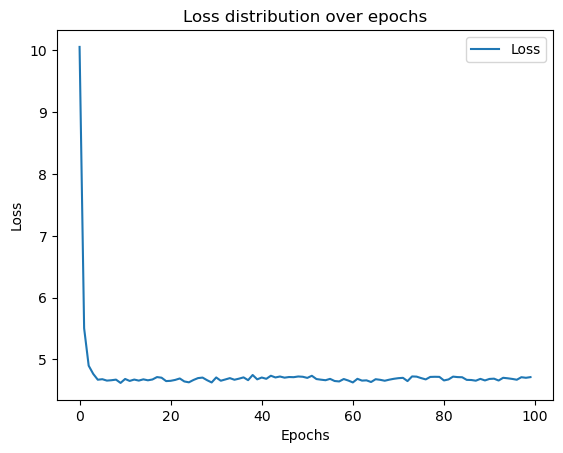

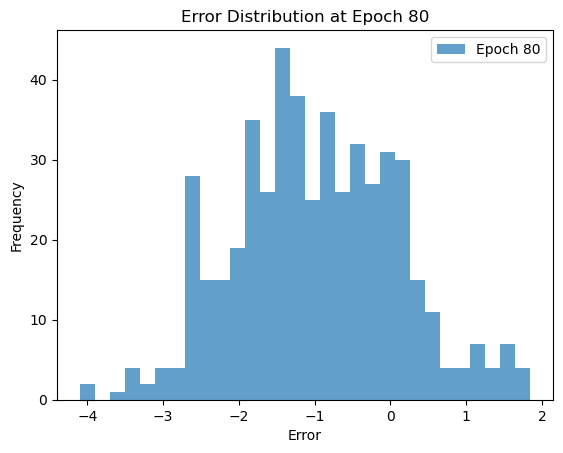

In [90]:
model = LinearRegressionSGD(lr=0.001, epochs=100, reg_type='l2', reg_lambda=0.3, alpha=0.5)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

**L2, lambda 0.5**

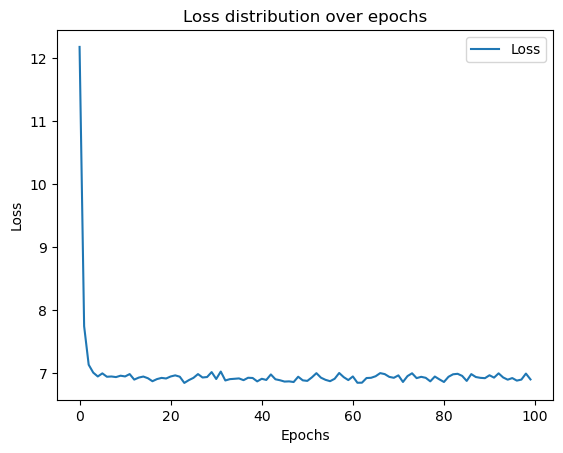

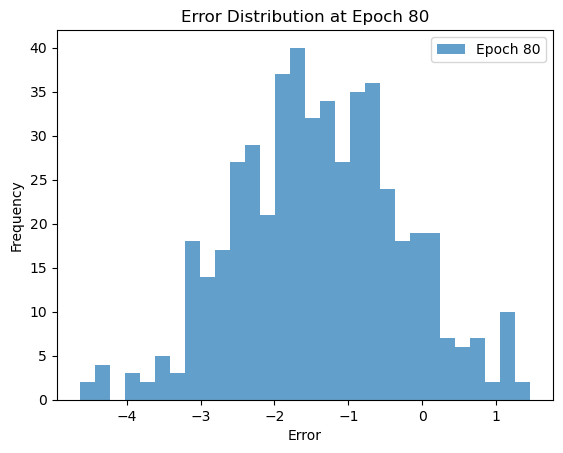

In [91]:
model = LinearRegressionSGD(lr=0.001, epochs=100, reg_type='l2', reg_lambda=0.5, alpha=0.5)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

При использовании только L1 или L2 лучше всего работает на маленьких lambda - то есть значение 0.1 сработало лучше.

Теперь посмотрим что будет на Elastic Net (оставляем lambda 0.1 и меняем параметр alpha - соотноешение между L1 и L2 регуляризациями)

**L1 + L2, lambda 0.1, alpha 0 (same as L2)**

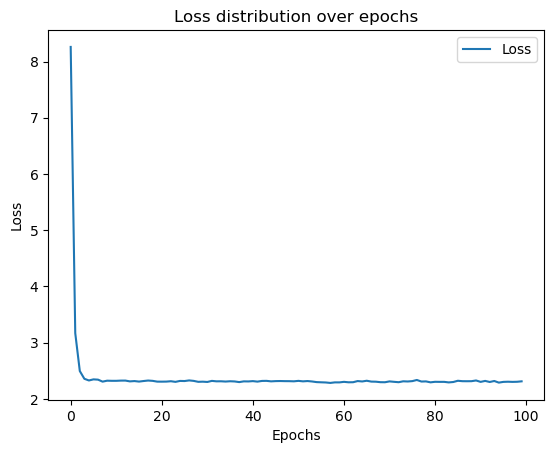

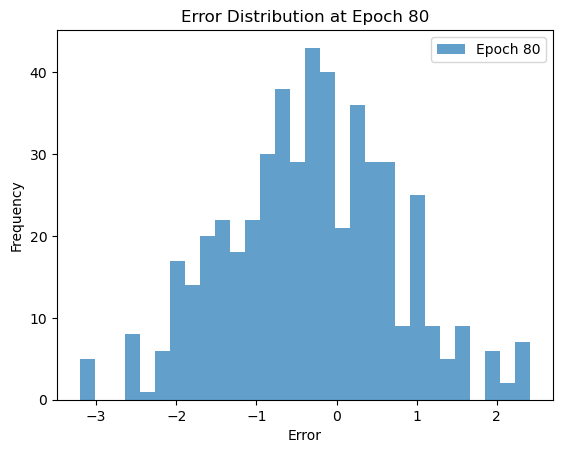

In [94]:
model = LinearRegressionSGD(lr=0.001, epochs=100, reg_type='elastic_net', reg_lambda=0.1, alpha=0)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

**L1 + L2, lambda 0.1, alpha 0.25**

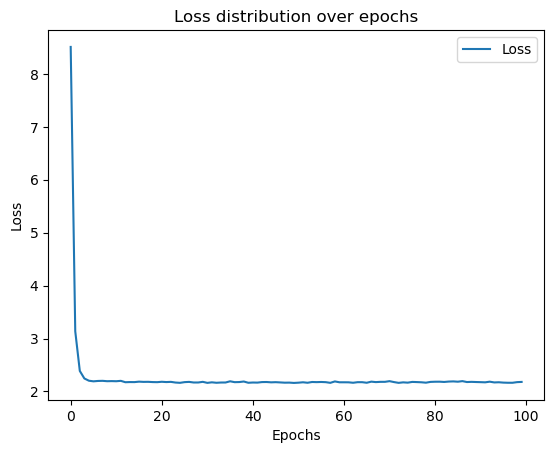

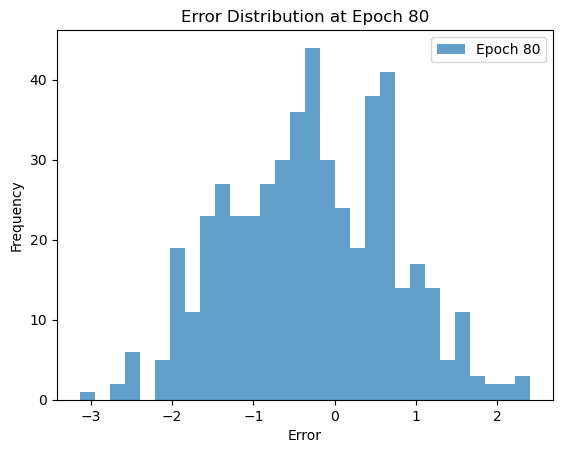

In [95]:
model = LinearRegressionSGD(lr=0.001, epochs=100, reg_type='elastic_net', reg_lambda=0.1, alpha=0.25)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

**L1 + L2, lambda 0.1, alpha 0.5**

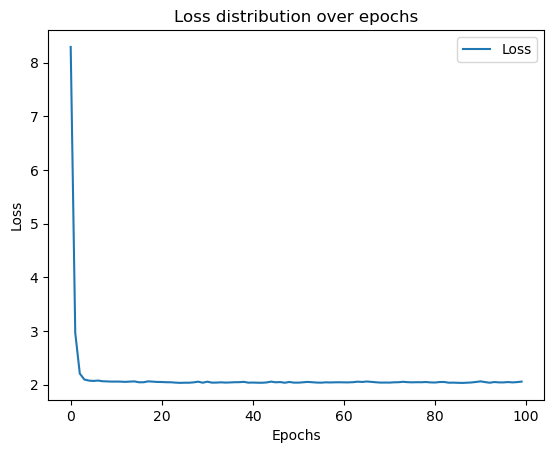

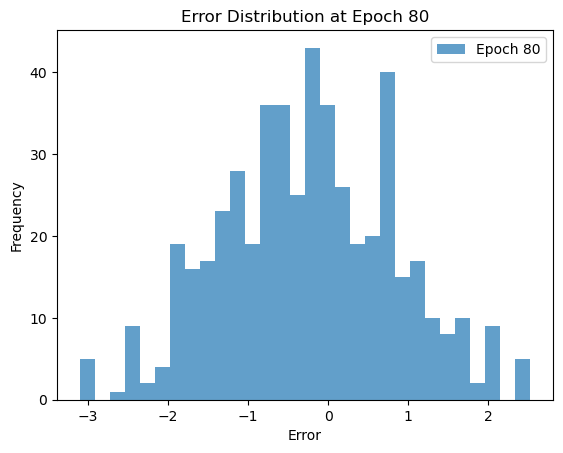

In [96]:
model = LinearRegressionSGD(lr=0.001, epochs=100, reg_type='elastic_net', reg_lambda=0.1, alpha=0.5)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

**L1 + L2, lambda 0.1, alpha 0.75**

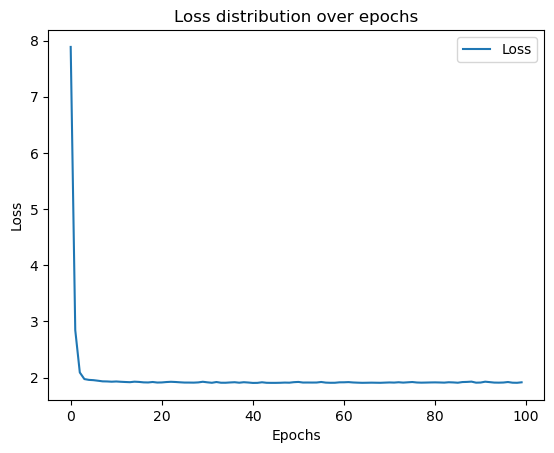

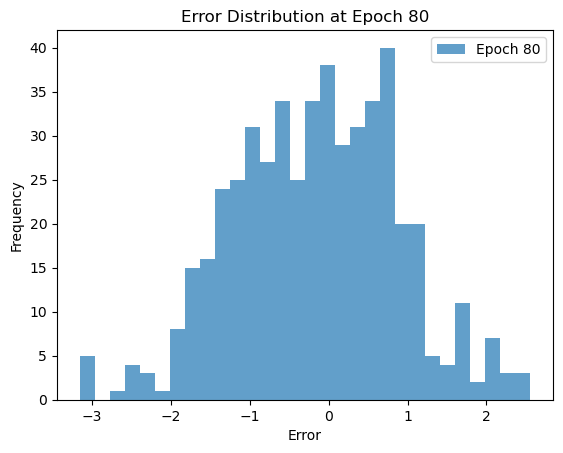

In [97]:
model = LinearRegressionSGD(lr=0.001, epochs=100, reg_type='elastic_net', reg_lambda=0.1, alpha=0.75)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

**L1 + L2, lambda 0.1, alpha 1.0 (same as L1)**

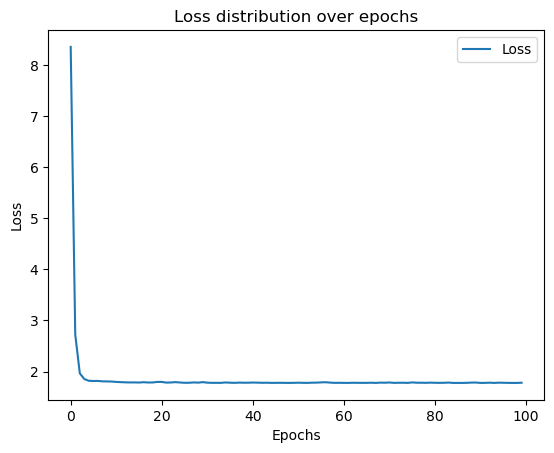

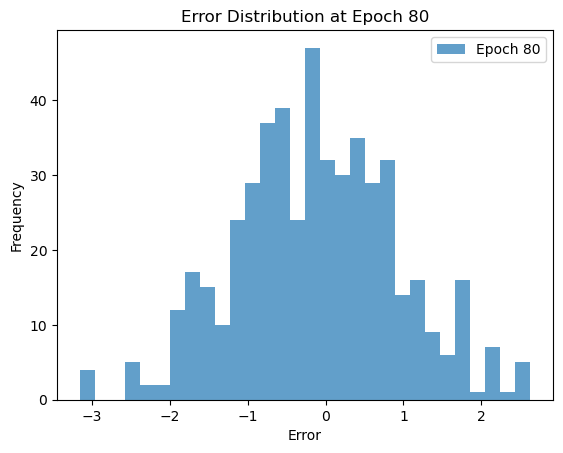

In [98]:
model = LinearRegressionSGD(lr=0.001, epochs=100, reg_type='elastic_net', reg_lambda=0.1, alpha=1)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

Честно говоря, тут уже оценить сложнее, поэтому посомтрим еще и на распределение ошибок. Как я понимаю, чем более приближенный пик к 0 тем лучше (то есть более вытянутый). Мне кажется, что лучше всего этот график выглядит с параметров alpha 0.75

Таким образом, данные графики могут помочь для подбора параметров линейной регрессии, но человеческий фактор играет и лучше исолпьзовать метрики

## Часть 3. (15 баллов)

**Разбейте ваши данные** на две части в процентном соотношении 80/20, используя функцию `train_test_split` из `scikit-learn`. Первую часть используйте как **тренировочную выборку**, а а вторую - как **тестовую**.

Посмотрите, **как меняются значения лоссов** на тренировочной и тестовой выборке в процессе обучения. Какие модели больше переобучаются, а какие меньше?

*Если вы не понимаете как разбить вашу выборку, посмотрите другой файл домашки `hw3_data_analysis.ipynb`*

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

Возьмем наши лучшие параметры и сравним все виды регуляризации, построив на одном графики loss тренировочной выборки и loss_test тестовой выборки (для loss_test считается только loss без изменения весов)

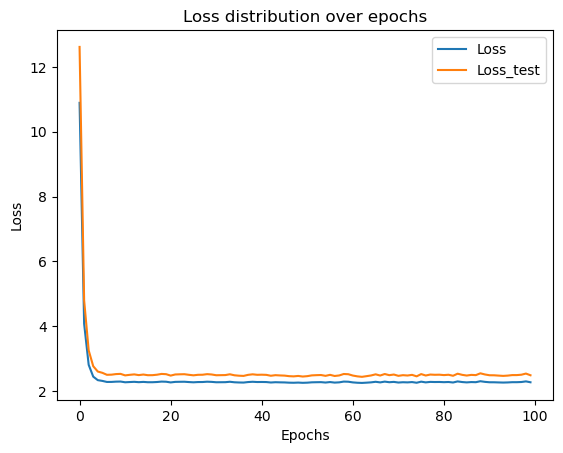

In [106]:
model = LinearRegressionSGD(lr=0.001, epochs=100, reg_type='l2', reg_lambda=0.1, alpha=0.75)
model.fit(X_train, y_train, X_test, y_test)
model.plot_loss()

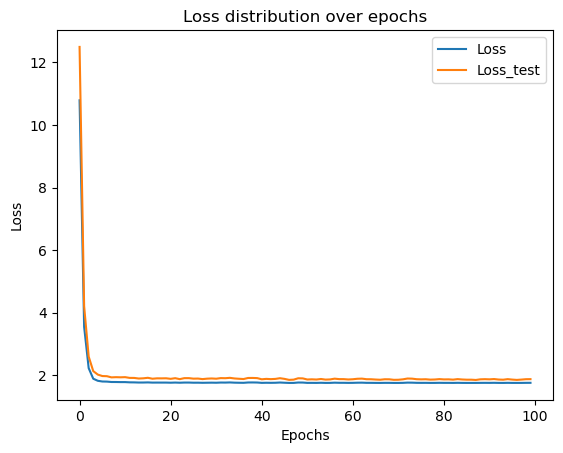

In [102]:
model = LinearRegressionSGD(lr=0.001, epochs=100, reg_type='l1', reg_lambda=0.1, alpha=0.75)
model.fit(X_train, y_train, X_test, y_test)
model.plot_loss()

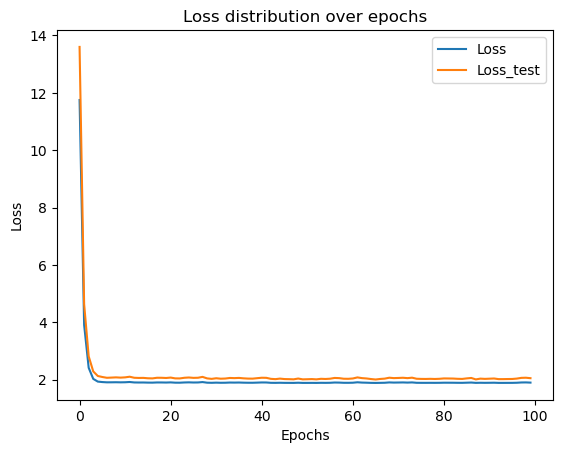

In [101]:
model = LinearRegressionSGD(lr=0.001, epochs=100, reg_type='elastic_net', reg_lambda=0.1, alpha=0.75)
model.fit(X_train, y_train, X_test, y_test)
model.plot_loss()

Если я правильно понимаю, то чем графики лучше накладываются друг на друга, тем лучше. Переобучения прям сильного как в примерах не получилось найти, но из этих трех вариантов хуже отрабатывает модель с L2 регуляризацией 

**Отлично! Вы дошли до конца этой сложной части третьей домашки!**

Вы уже поняли, что мы ждём ваши впечатления. Особенно важно то, сколько времени у вас заняла эта часть. Нравятся ли вам задания с собственной реализацией методов и классов?

Задание инетересное, как написать функции я прям долго не понимала и много времени на это потратила, дальше полегче было, ну и после консультации понятнее стало

Мне больше нравятся задания на реальнях данных, когда понятно куда и как это можно применить, понятно что первое такое тренировочное на раномных данных

## Давайте следующий вопрос

Вставьте картинку, которая ассоциируется с вашим **любимым путешествием**. Пусть это будут горы или озёра, или любимая кафешка за пределами города, или фотка дома с котом, где вы провели какое-нибудь лето. Что угодно, где вам было комфортно и от чего у вас возникают тёплые воспоминания.

А вот уже по адресу, хотелось бы скинуть целый альбом, но ограничемся закатом на Алтае около стоянки древнего человека (до сих пор не верю что на камнях могли сохраниться рисунки ахаха)

<img src="../data/IMG_7923.jpeg" width="900">

In [3]:
#We travel for romance, we travel for architecture, and we travel to be lost.
#Ray Bradbury